# Network Clusters

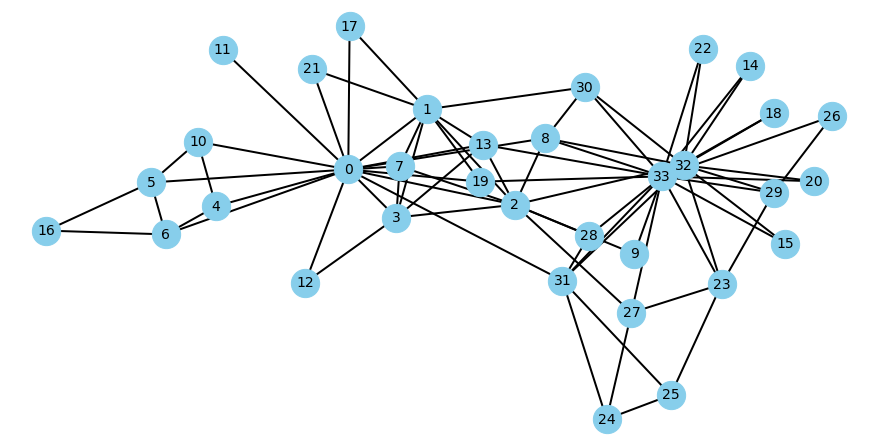

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

graph = nx.karate_club_graph()

pos=nx.spring_layout(graph, k=1/(34**0.5), seed=7)
draw_params = {'with_labels':True, 'node_color':'skyblue',
               'node_size':800, 'width':2, 
               'font_size':14}
plt.figure(figsize=(12, 6))
nx.draw(graph, pos, **draw_params)
plt.show()

### Communities and Separations

All cliques of four: [[0, 1, 2, 3, 13], [0, 1, 2, 3, 7], [33, 32, 8, 30], [33, 32, 23, 29]]
Found these communities: [[0, 1, 2, 3, 7, 13], [32, 33, 8, 30], [32, 33, 29, 23]]


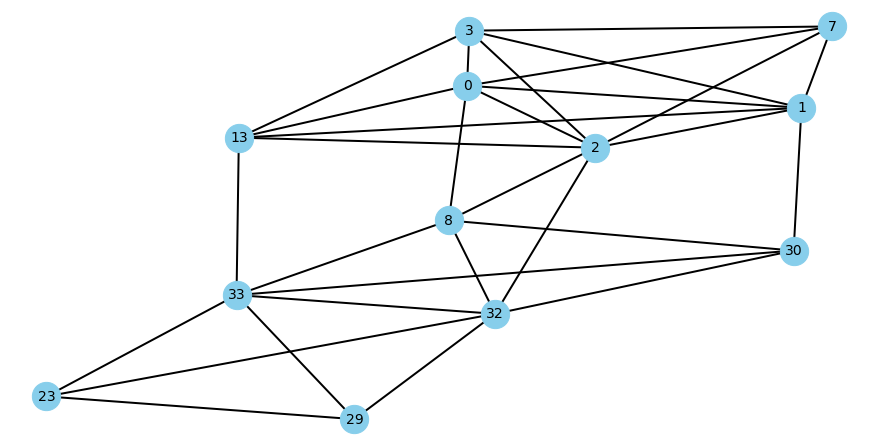

In [2]:
from networkx.algorithms.community.kclique import k_clique_communities

graph = nx.karate_club_graph()
# Finding and printing all cliques of four
cliques = nx.find_cliques(graph)
print ('All cliques of four: %s' 
       % [c for c in cliques if len(c)>=4])

# Joining cliques of four into communities
communities = k_clique_communities(graph, k=4)
communities_list = [list(c) for c in communities]
nodes_list = [node for community in communities_list for 
              node in community]
print ('Found these communities: %s' % communities_list)

# Printing the subgraph of communities
subgraph = graph.subgraph(nodes_list)
pos=nx.spring_layout(subgraph, seed=32)
plt.figure(figsize=(12, 6))
nx.draw(subgraph, pos, **draw_params)
plt.show()

# Degrees of Separation

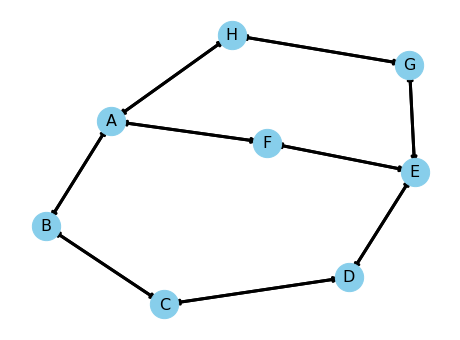

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

data  = {'A': ['B', 'F', 'H'],
         'B': ['A', 'C'],
         'C': ['B', 'D'],
         'D': ['C', 'E'],
         'E': ['D', 'F', 'G'],
         'F': ['E', 'A'],
         'G': ['E', 'H'],
         'H': ['G', 'A']}

graph = nx.DiGraph(data)
pos=nx.spring_layout(graph, seed=1)
plt.figure(figsize=(8, 6))
plt.box(False)
nx.draw_networkx_labels(graph, pos, font_size=16)
nx.draw_networkx_nodes(graph, pos, node_shape="o", node_color='skyblue', node_size=800)
nx.draw_networkx_edges(graph, pos, width=3)
plt.show()

In [4]:
nx.shortest_path_length(graph, 'A')

{'A': 0, 'B': 1, 'H': 1, 'F': 1, 'C': 2, 'G': 2, 'E': 2, 'D': 3}

# Random Walks

In [5]:
import random
random.seed(0)

paths = nx.all_simple_paths(graph, 'A', 'H')

path_list = []
for path in paths:
    path_list.append(path)
    print("Path Candidate: ", path)
    
sel_path = random.randint(0, len(path_list) - 1)

print("The selected path is: ", path_list[sel_path])

Path Candidate:  ['A', 'B', 'C', 'D', 'E', 'G', 'H']
Path Candidate:  ['A', 'F', 'E', 'G', 'H']
Path Candidate:  ['A', 'H']
The selected path is:  ['A', 'F', 'E', 'G', 'H']
